In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

In [2]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [3]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [4]:
customerDf = pd.read_csv("https://raw.githubusercontent.com/dcjh/1015_Mini_Project/main/Datasets/cleaned_customer.csv") 

In [5]:
incomeDf = customerDf.loc[:, ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer', 'Recency']]

In [6]:
incomeDf['Dt_Customer'] = pd.to_datetime(incomeDf['Dt_Customer'], format='%d-%m-%Y')
incomeDf["CurrentDate"] = datetime.datetime(2021, 1, 1)
incomeDf['numMonths'] = ((incomeDf['CurrentDate'] - incomeDf['Dt_Customer'])/np.timedelta64(1, 'M'))
incomeDf['Recency'] = incomeDf['Recency']/30 #assume 30days in a month

In [7]:
#average purchases over the months
for var in incomeDf.columns[1:7]:
    incomeDf[var] = incomeDf[var]/ (incomeDf["numMonths"] - incomeDf["Recency"])

incomeDf.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths", "Recency"], inplace = True)

In [8]:
incomeDf

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58138.0,6.481022,0.898157,5.572659,1.755490,0.898157,0.898157
1,46344.0,0.136519,0.012411,0.074465,0.024822,0.012411,0.074465
2,71613.0,4.867850,0.559917,1.451213,1.268383,0.239964,0.479929
3,26646.0,0.134427,0.048882,0.244412,0.122206,0.036662,0.061103
4,58293.0,2.154818,0.535591,1.469760,0.572957,0.336301,0.186834
...,...,...,...,...,...,...,...
2211,61223.0,7.956164,0.482532,2.042344,0.471310,1.324157,2.771753
2212,64014.0,5.280512,0.000000,0.390186,0.000000,0.000000,0.104049
2213,56981.0,11.323378,0.598593,2.706138,0.399062,0.149648,0.299296
2214,69245.0,5.157396,0.361500,2.578698,0.963999,0.361500,0.735049


In [9]:
'''
box plot*
histogram*
jointplots*
corr*
linear Regression*
k means clustering*
'''

'\nbox plot*\nhistogram*\njointplots*\ncorr*\nlinear Regression*\nk means clustering*\n'

In [10]:
incomeDf.describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,3.434783,0.298550,1.889912,0.425897,0.305814,0.494776
std,25173.076661,3.774008,0.453732,2.540929,0.621686,0.466487,0.584823
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.277336,0.020148,0.178176,0.031087,0.012748,0.103556
50%,51381.500000,1.982401,0.091109,0.756134,0.135817,0.095060,0.274890
75%,68522.000000,5.736124,0.369209,2.608185,0.559684,0.385290,0.639012
max,666666.000000,17.179104,2.451923,20.074911,3.262791,3.321490,3.693851


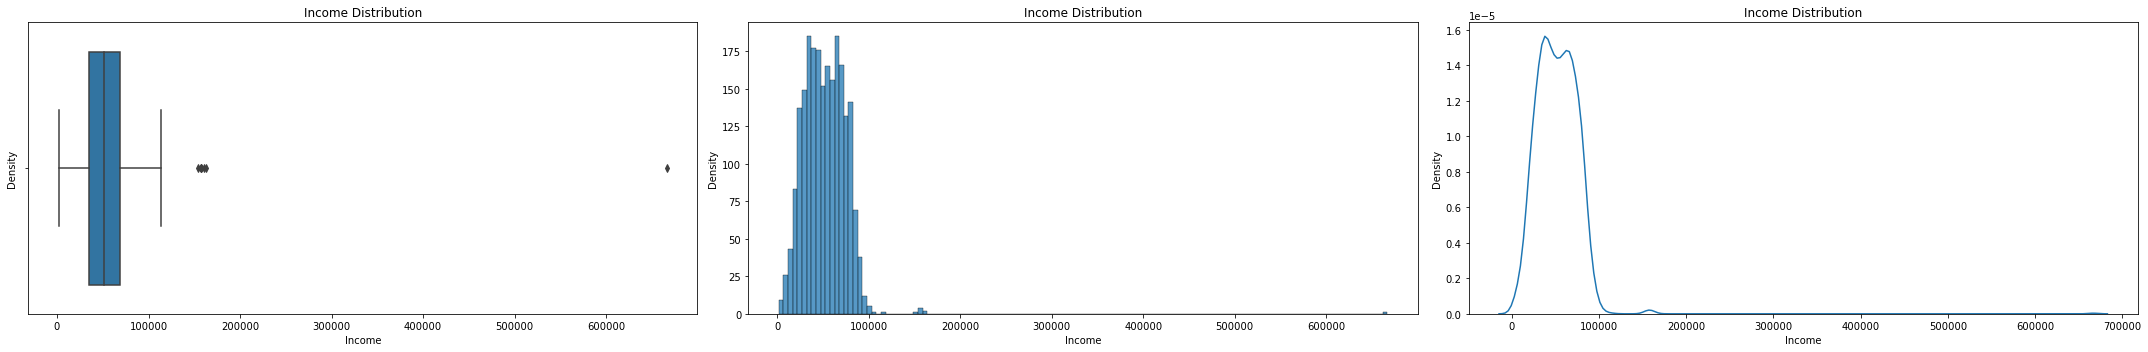

In [11]:
f, axes = plt.subplots(1, 3, figsize=(30,5))
sb.boxplot(x =incomeDf['Income'], ax=axes[0])
sb.histplot(x =incomeDf['Income'], ax=axes[1])
sb.kdeplot(x =incomeDf['Income'], ax=axes[2])
for i in range(3):
    axes[i].set_title('Income Distribution')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [12]:
income_cleaned = removeOut(incomeDf)

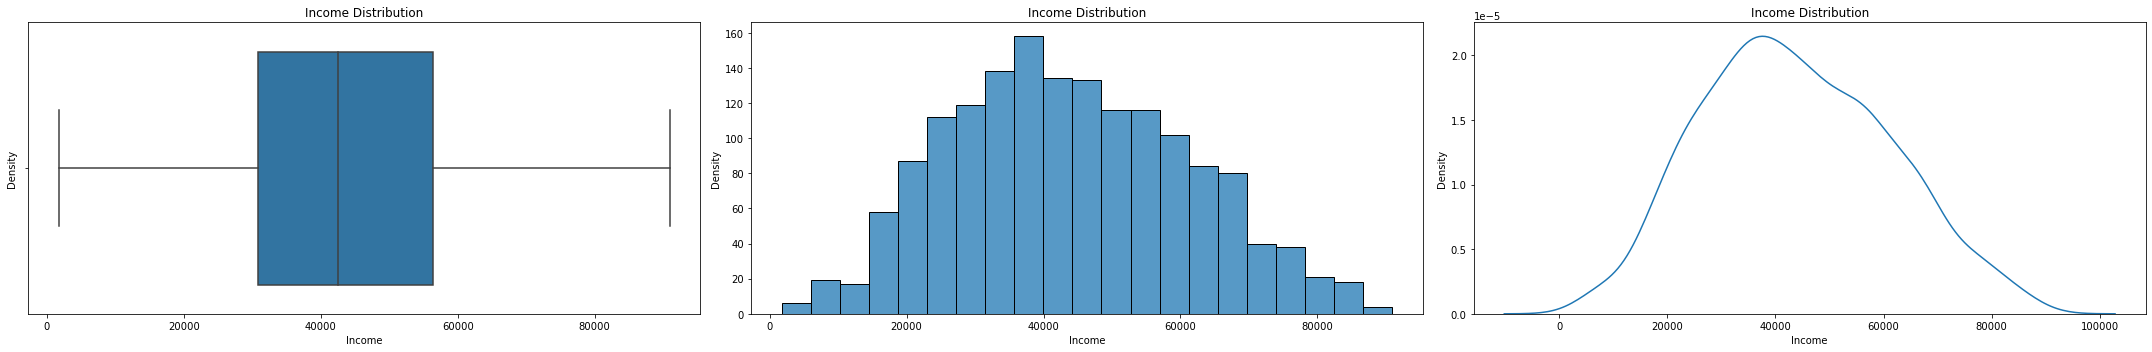

In [13]:
f, axes = plt.subplots(1, 3, figsize=(30,5))
sb.boxplot(x = income_cleaned['Income'], ax=axes[0])
sb.histplot(x = income_cleaned['Income'], ax=axes[1])
sb.kdeplot(x = income_cleaned['Income'], ax=axes[2])
for i in range(3):
    axes[i].set_title('Income Distribution')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

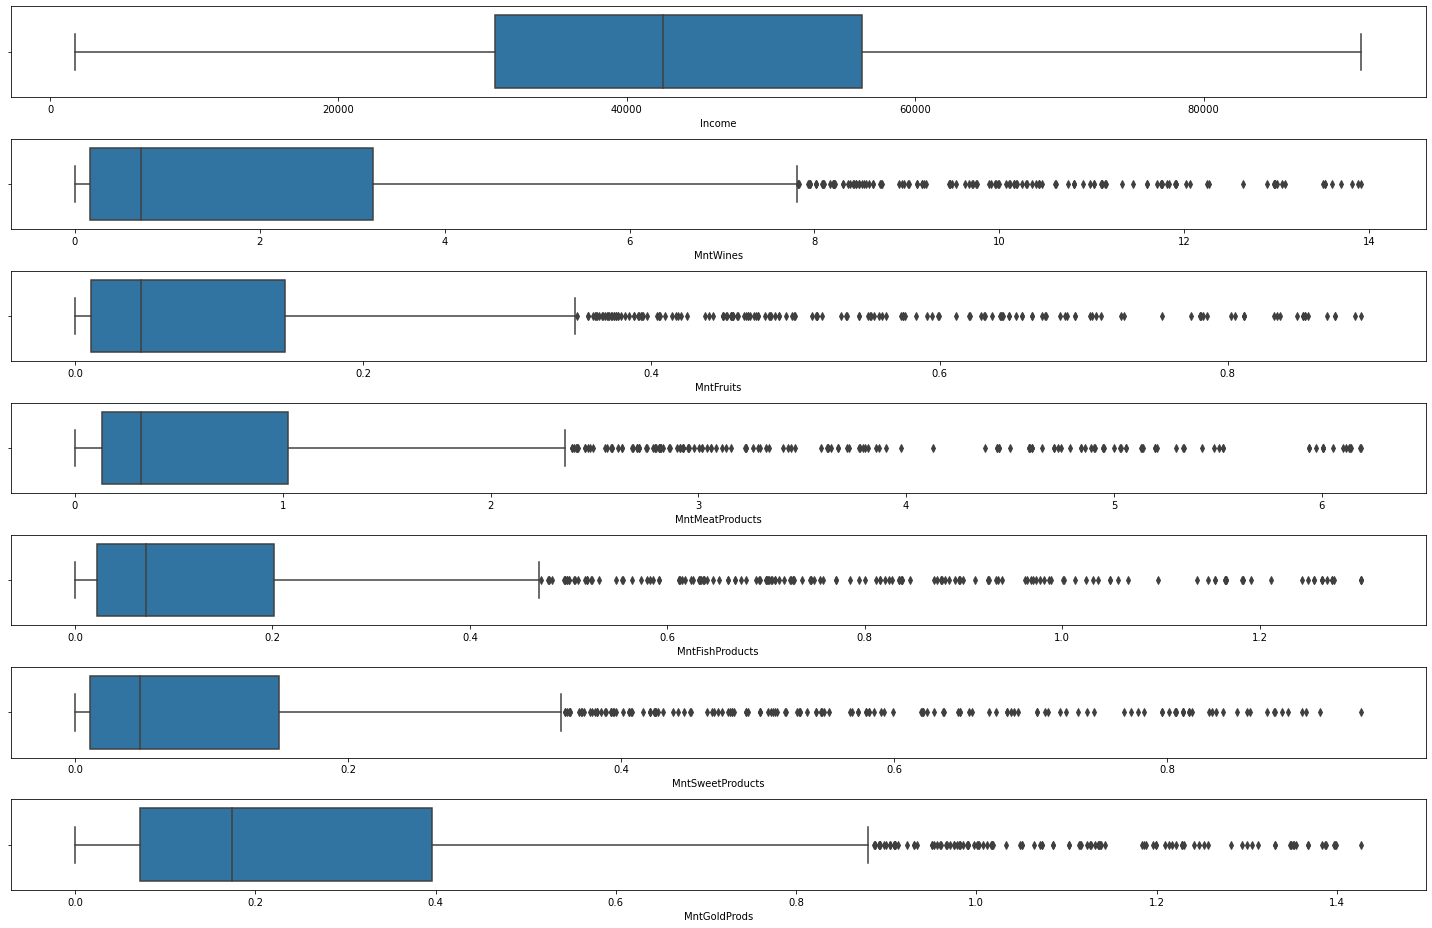

In [14]:
f, axes = plt.subplots(7, figsize=(20,13))

count=0
for var in income_cleaned:
    sb.boxplot(x = income_cleaned[var], orient = "h", ax = axes[count])
    count+=1

plt.tight_layout()
plt.show()


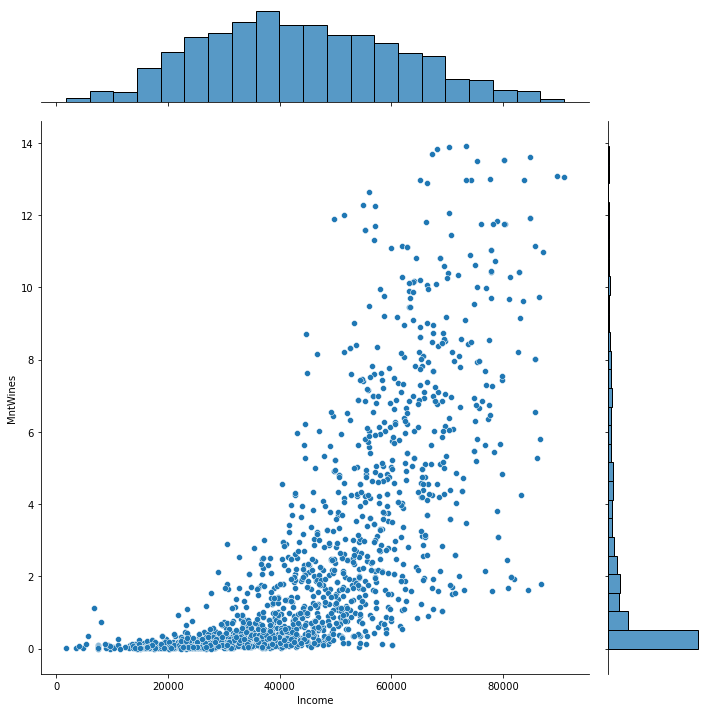

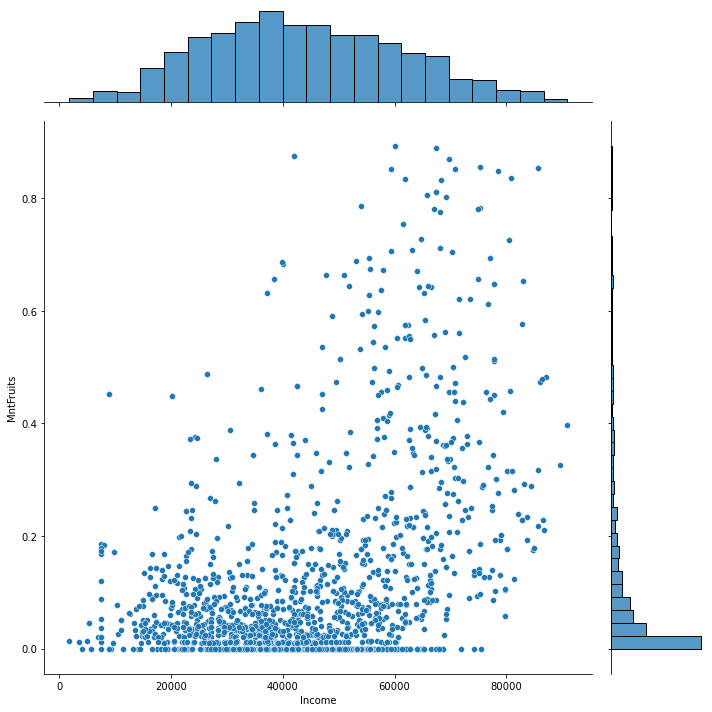

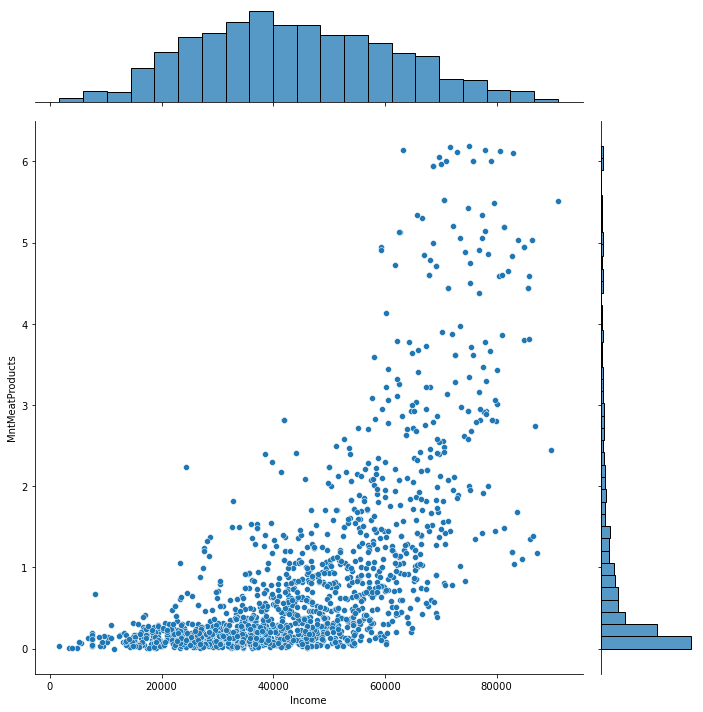

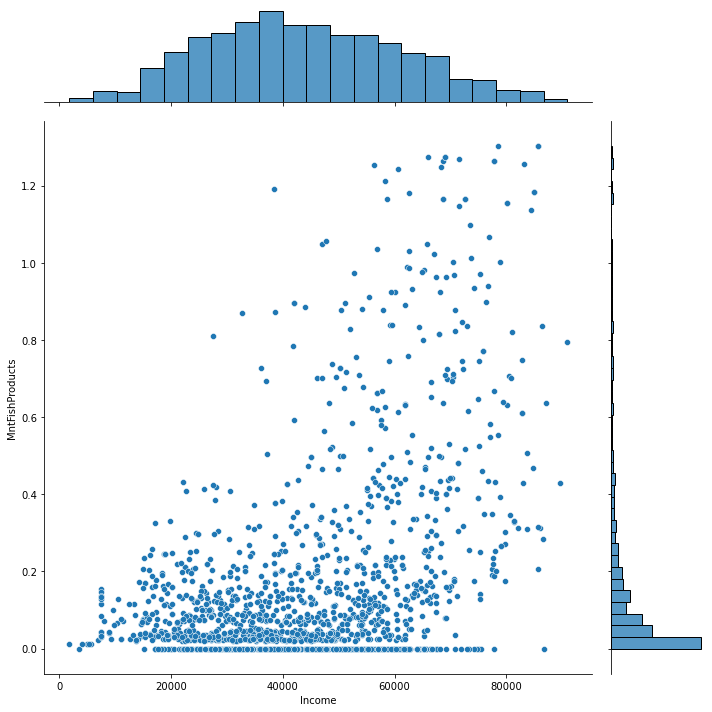

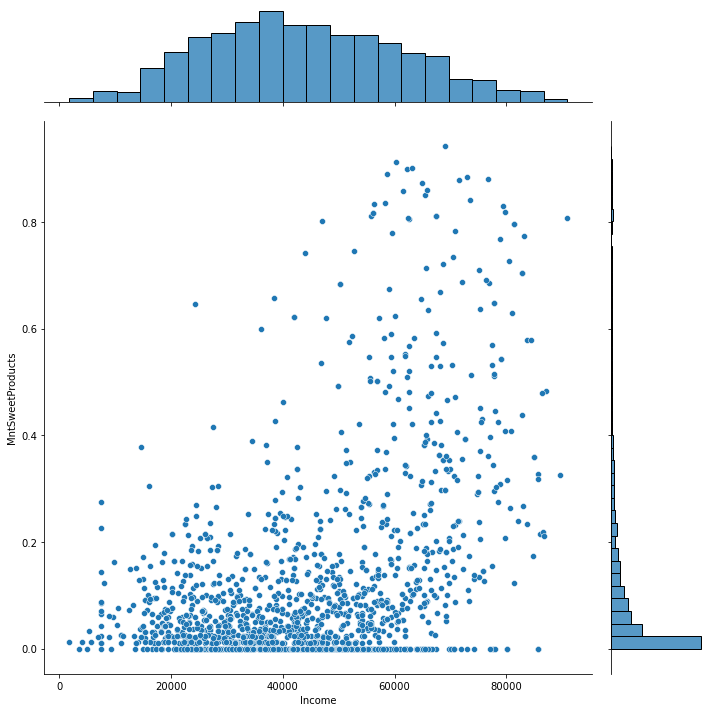

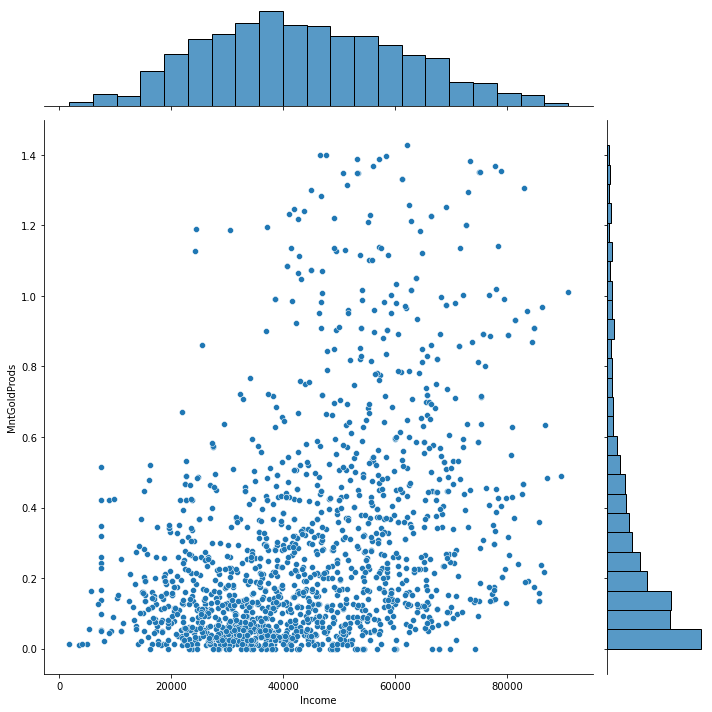

In [15]:
for var in income_cleaned.columns[1:]:
    sb.jointplot(data = income_cleaned, y = var, x = "Income", height = 10)

plt.tight_layout()
plt.show()

<AxesSubplot:>

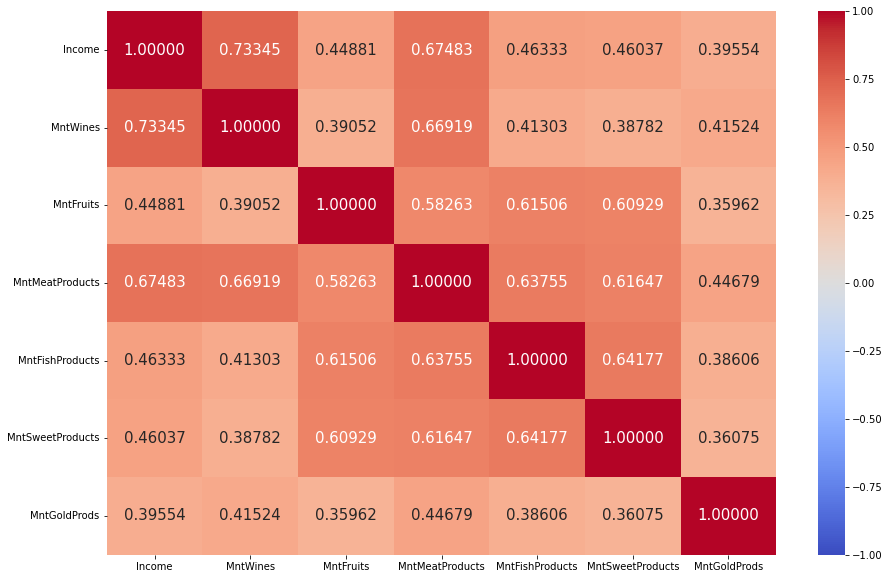

In [16]:
f = plt.figure(figsize=(15, 10))
sb.heatmap(income_cleaned.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".5f", annot_kws = {"size": 15}, cmap='coolwarm')

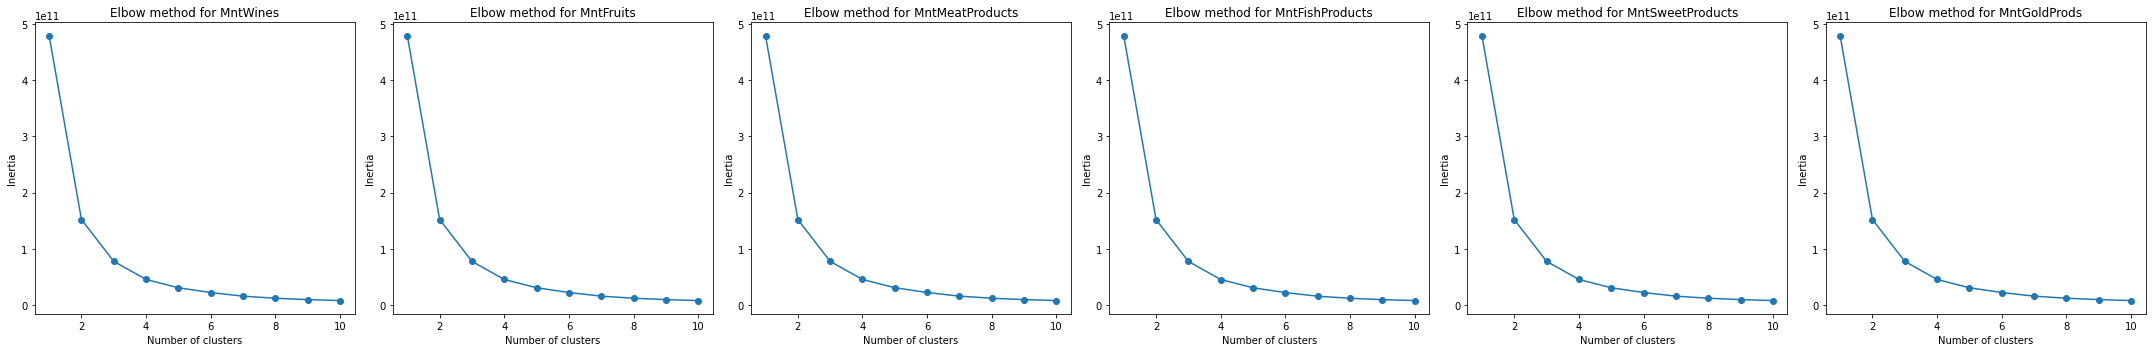

In [19]:
from sklearn.cluster import KMeans
data = []
count = 0
for var in income_cleaned.columns[1:]:
    data.append(list(zip(income_cleaned["Income"], income_cleaned[var])))
    count+=1

f, axes = plt.subplots(1, 6, figsize=(30,5))


count=0
for i in range(len(data)):
    inertias = []
    for j in range(1,11):
        kmeans = KMeans(n_clusters=j)
        kmeans.fit(data[i])
        inertias.append(kmeans.inertia_)
    axes[i].plot(range(1,11), inertias, marker='o')
    axes[i].set_title(f'Elbow method for {income_cleaned.columns[i + 1]}')
    axes[i].set_xlabel('Number of clusters')
    axes[i].set_ylabel('Inertia')
    count+=1

plt.tight_layout()
plt.show()


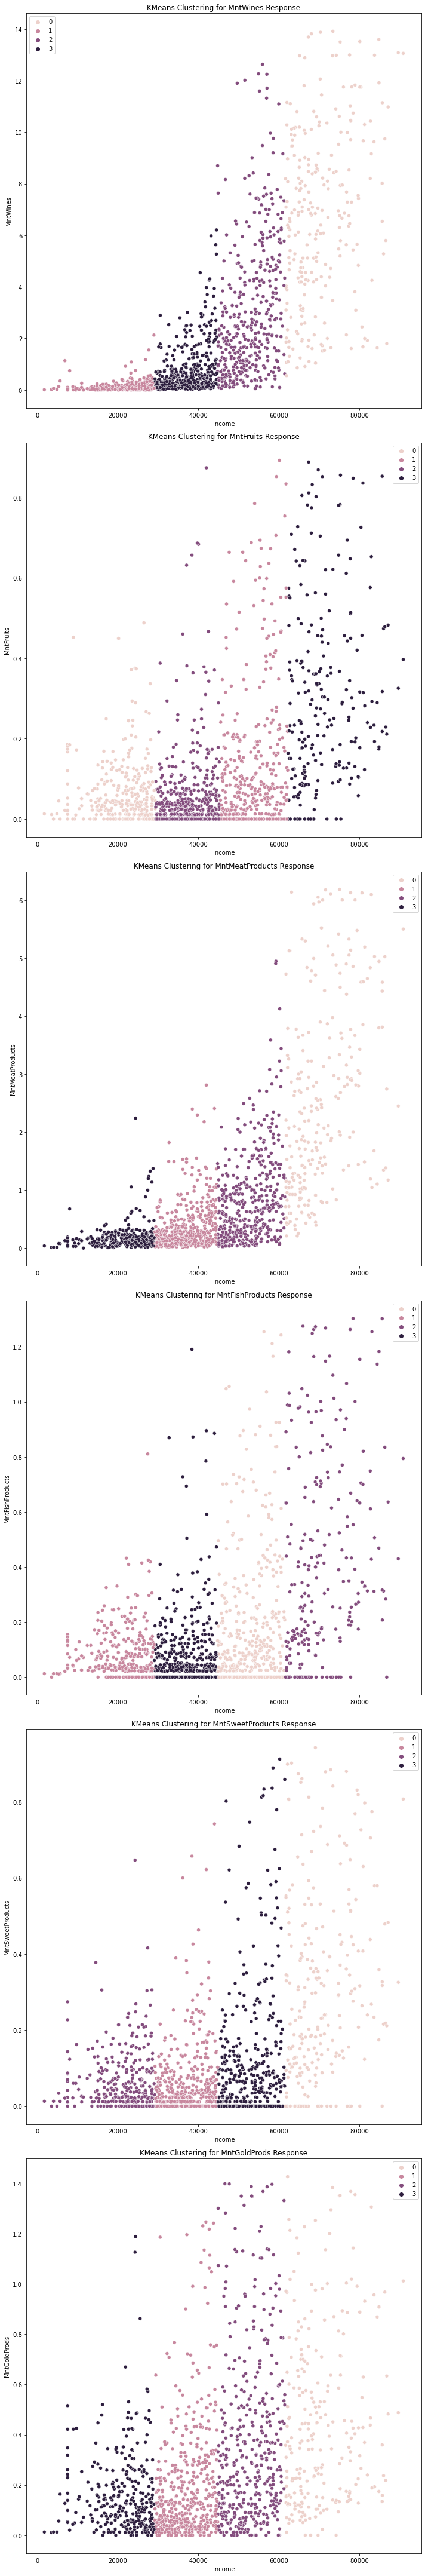

In [ ]:
f, axes = plt.subplots(6, figsize=(10,60))

kmeans = KMeans(n_clusters =  4)

for i in range(len(data)):
    kmeans.fit(data[i])
    sb.scatterplot(data = income_cleaned, x = "Income", y = income_cleaned.columns[i + 1], hue=kmeans.labels_, ax=axes[i])
    axes[i].set_title(f'KMeans Clustering for {income_cleaned.columns[i + 1]} Response')
    axes[i].set_xlabel("Income")
    axes[i].set_ylabel(income_cleaned.columns[i + 1])

plt.tight_layout()
plt.show()
